<a href="https://colab.research.google.com/github/amitsiwach/Deep_Learning_basics/blob/main/Regularization_and_Loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ regularization

In [1]:
from tensorflow import keras

In [2]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               235500    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [6]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Max-Norm Regularization

In [7]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01), # we can use one or more than one regularization together as like here we are using L2 & Max_norm both
                           kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [8]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               235500    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Dropout

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [10]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 10)               

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use("fivethirtyeight")

# Common loss functions

## For Regression:- 

### 1. Mean Abslolute Error (MAE) | $l_1$ Loss function | L1-norm Loss Function (Least Absolute Error LAE):


$$MAE = \frac{1}{m}\sum_{i=1}^m |y^{(i)} - \hat{y}^{(i)}|$$

**L1 loss function** are also known as **Least Absolute Deviations** in short **LAD**.

It is used to minimize the error which is the mean of sum of all the absolute differences in between the true value and the predicted value.

In [12]:
def MAE(actual, pred):

  return np.abs(actual - pred)

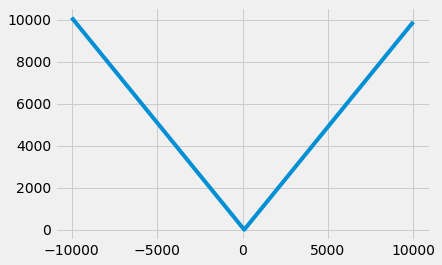

In [13]:
actual_arr = np.repeat(100, 10000)
pred_arr = np.arange(-10000, 10000, 2)

loss_mae = [MAE(actual, pred) for actual, pred in zip(actual_arr, pred_arr)]

plt.plot(pred_arr, loss_mae)

In [14]:
total_loss = np.mean(np.sum(loss_mae))
total_loss

50005100.0

### 2. Mean Squared Error (MSE) | $l_2$ Loss function | L2-norm Loss Function (Least Squares Error LSE):


$$MSE = \frac{1}{m}\sum_{i=1}^m (y^{(i)} - \hat{y}^{(i)})^2$$


It is used to minimize the error which is the mean of sum of all the squared differences in between the true value and the pedicted value.

**The disadvantage** of the **L2 norm** is that when there are outliers, these points will account for the main component of the loss. 

In [15]:
def MSE(actual, pred):

  return np.square(actual - pred)

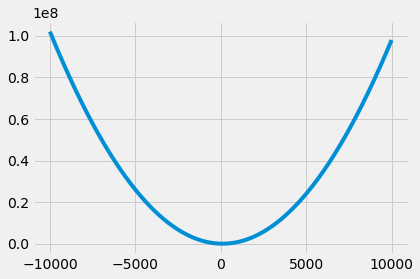

In [16]:
actual_arr = np.repeat(100, 10000)
pred_arr = np.arange(-10000, 10000, 2)

loss_mSe = [MSE(actual, pred) for actual, pred in zip(actual_arr, pred_arr)]

plt.plot(pred_arr, loss_mSe)

In [17]:
total_loss = np.mean(np.sum(loss_mSe))
total_loss

333435340000.0

# 3. Huber Loss 

Huber Loss is often used in regression problems. Compared with L2 loss, Huber Loss is less sensitive to outliers(because if the residual is too large, it is a piecewise function, loss is a linear function of the residual).

$$L_\delta(y, \hat{y}) = \left\{\begin{matrix}
\frac{1}{2}(y - \hat{y})^2, & for\ |y - \hat{y}| \le \delta\\ 
\delta(|y - \hat{y}| - \frac{1}{2}\delta), & otherwise
\end{matrix}\right.
$$

Among them, $\delta$ is a set parameter, $y$ represents the real value, and $f(x)$ represents the predicted value.

The advantage of this is that when the residual is small, the loss function is L2 norm, and when the residual is large, it is a linear function of L1 norm


[Wiki](https://en.wikipedia.org/wiki/Huber_loss)

In [18]:
def huber(true, pred, delta):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: smoothed mean absolute error loss
    """
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return loss

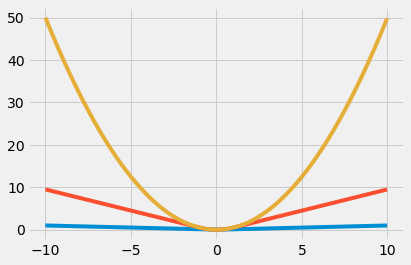

In [19]:
actual_arr = np.repeat(0, 1000)
pred_arr = np.arange(-10, 10, 0.02)

deltas = [0.1, 1, 10]

loss_huber = [[huber(actual, pred, delta) for actual, pred in zip(actual_arr, pred_arr)] for delta in deltas]

for idx in range(len(deltas)):
  plt.plot(pred_arr, loss_huber[idx])

# 4. Pseudo Huber Loss 

The Pseudo-Huber loss function can be used as a smooth approximation of the Huber loss function. 

It combines the best properties of $L2$ squared loss and $L1$ absolute loss by being strongly convex when close to the target/minimum and less steep for extreme values. 

The scale at which the Pseudo-Huber loss function transitions from $L2$ loss for values close to the minimum to $L1$ loss for extreme values and the steepness at extreme values can be controlled by the $\delta$  value. 

The Pseudo-Huber loss function ensures that derivatives are continuous for all degrees

$$L_\delta(y, \hat{y}) = \delta^2 (\sqrt{1 + ((y - \hat{y})/\delta)^2} - 1)
$$


In [20]:
x_function = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

delta1 = tf.constant(0.2)
pseudo_huber1_output = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_function)/delta1)) - 1.)
# pseudo_huber1_output = sess.run(pseudo_huber1)

delta2 = tf.constant(1.)
pseudo_huber2_output = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_function) / delta2)) - 1.)
# pseudo_huber2_output = sess.run(pseudo_huber2)

delta3 = tf.constant(5.)
pseudo_huber3_output = tf.multiply(tf.square(delta3), tf.sqrt(1. + tf.square((target - x_function) / delta2)) - 1.)
# pseudo_huber3_output = sess.run(pseudo_huber3)

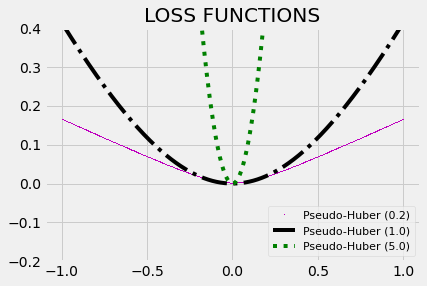

In [21]:
x_array = x_function
plt.plot(x_array, pseudo_huber1_output, 'm,', label='Pseudo-Huber (0.2)')
plt.plot(x_array, pseudo_huber2_output, 'k-.', label='Pseudo-Huber (1.0)')
plt.plot(x_array, pseudo_huber3_output, 'g:', label='Pseudo-Huber (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.title('LOSS FUNCTIONS')
plt.show()

# For Classification 

<img src="https://gombru.github.io/assets/cross_entropy_loss/multiclass_multilabel.png" width=70%></img>

## 3.Hinge Loss

Hinge loss is often used for binary classification problems, such as ground true: t = 1 or -1, predicted value y = wx + b

In the svm classifier, the definition of hinge loss is

$$l(y) = max(0, 1-t.y)$$

In other words, the closer the y is to t, the smaller the loss will be.

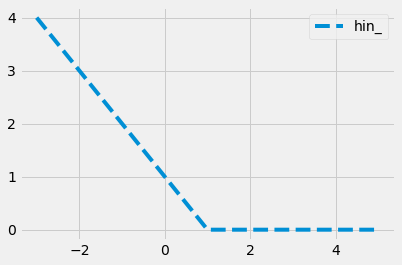

In [22]:
x_guess2 = tf.linspace(-3.,5.,500)
x_actual2 = tf.convert_to_tensor([1.]*500)

#Hinge loss
#hinge_loss = tf.losses.hinge_loss(labels=x_actual2, logits=x_guess2)
hinge_loss = tf.maximum(0.,1.-(x_guess2*x_actual2))
# with tf.Session() as sess:
x_,hin_ = [x_guess2, hinge_loss]
plt.plot(x_,hin_,'--', label='hin_')
plt.legend()
plt.show()

## 4.Cross-entropy loss


$$J(w) = -y.log(\hat{y}) - (1 - y).log(1-\hat{y}) = - \sum_{i}p_i. log(q_i)$$

Cross-entropy loss is mainly applied to binary classification problems. The predicted value is a probability value and the loss is defined according to the cross entropy. Note the value range of the above value: the predicted value of y should be a probability and the value range is [0,1]



## 5.Sigmoid-Cross-entropy loss

The above cross-entropy loss requires that the predicted value is a probability. Generally, we calculate $scores = x*w + b$. Entering this value into the sigmoid function can compress the value range to (0,1).

<img src="./Images/img9.png">

It can be seen that the sigmoid function smoothes the predicted value(such as directly inputting 0.1 and 0.01 and inputting 0.1, 0.01 sigmoid and then entering, the latter will obviously have a much smaller change value), which makes the predicted value of sigmoid-ce far from the label loss growth is not so steep.

## 6.Softmax cross-entropy loss

First, the softmax function can convert a set of fraction vectors into corresponding probability vectors. Here is the definition of softmax function

$$softmax(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K}{e^{z_k}}}$$

As above, softmax also implements a vector of 'squashes' k-dimensional real value to the [0,1] range of k-dimensional, while ensuring that the cumulative sum is 1.

According to the definition of cross entropy, probability is required as input.Sigmoid-cross-entropy-loss uses sigmoid to convert the score vector into a probability vector, and softmax-cross-entropy-loss uses a softmax function to convert the score vector into a probability vector.

According to the definition of cross entropy loss.

$$H(p,q) = - \sum_{x}p(x)log(q(x))$$

where $p(x)$ represents the probability that classification $x$ is a correct classification, and the value of $p$ can only be 0 or 1. This is the prior value

$q(x)$ is the prediction probability that the $x$ category is a correct classification, and the value range is (0,1)

So specific to a classification problem with a total of C types, then $p(x_j)$, $(0 \le j \le C)$ must be only 1 and C-1 is 0(because there can be only one correct classification, correct the probability of classification as correct classification is 1, and the probability of the remaining classification as correct classification is 0)

Then the definition of softmax-cross-entropy-loss can be derived naturally.

Here is the definition of softmax-cross-entropy-loss.

$$L_i = - log(\frac{e^{f_{y_i}}}{\sum_{j}{e^{f_{y_j}}}})$$

Where $f_j$ is the score of all possible categories, and $f_{y_i}$ is the score of ground true class

## Reference -

[1] https://gombru.github.io/2018/05/23/cross_entropy_loss/